## Observations and Insights
******************** Summary Analysis *************************
The analysis containes 248 unique mice in a given timepoint. There are 49% female mice and 51% male mice. More than 200 mice were given Capomulin and Ramicane drug regimen in this study. The Capomulin drug regimen seems to be an effective
drug regimen to treat cancer. The tumor size in Mouse ID s185 descreased as the time went on. We focused on Capomulin,
Ramicane, Infubinol, and Ceftamin drug regiment. Capomulin and Ramicane were most effective at decreasing tumor size. The
other two drug regimen were least effective treating cancer. Therefore, I would recommend further studies in the two effective
drug regimen.
***************************** End ********************


In [1]:


# Dependencies and Setup
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# view the dataframe
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Checking the number of mice
mouse_count = combined_data["Mouse ID"].count()
mouse_count

1893

In [5]:

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"], keep="last")]
duplicated_mouseID = duplicate["Mouse ID"].values[0]
duplicated_mouseID
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"] != duplicated_mouseID]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(set(clean_df["Mouse ID"]))

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properti
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
stats_summary = pd.DataFrame({
    "Tumor_Vol_Mean": mean, 
    "Tumor_Vol_Median": median, 
    "Tumor_Vol_Var": variance, 
    "Tumor_Vol_Stdev": std, 
    "Tumor_Vol_SEM": sem
})
stats_summary

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# # Using the aggregation method, produce the same summary statistics in a single line
# # group the data by Drug Regimen and Tumor Volume(mm3)

combined_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean", "median", 'std', 'sem','var']})


Tumor Volume (mm3)                                          
                           mean     median       std       sem        var
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  0.329346  24.947764
Ceftamin              52.591172  51.776157  6.268188  0.469821  39.290177
Infubinol             52.884795  51.820584  6.567243  0.492236  43.128684
Ketapril              55.235638  53.698743  8.279709  0.603860  68.553577
Naftisol              54.331565  52.509285  8.134708  0.596466  66.173479
Placebo               54.033581  52.288934  7.821003  0.581331  61.168083
Propriva              52.322552  50.854632  6.507770  0.512884  42.351070
Ramicane              40.216745  40.673236  4.846308  0.320955  23.486704
Stelasyn              54.233149  52.431737  7.710419  0.573111  59.450562
Zoniferol             53.236507  51.818479  6.966589  0.516398  48.533355

## Bar and Pie Charts

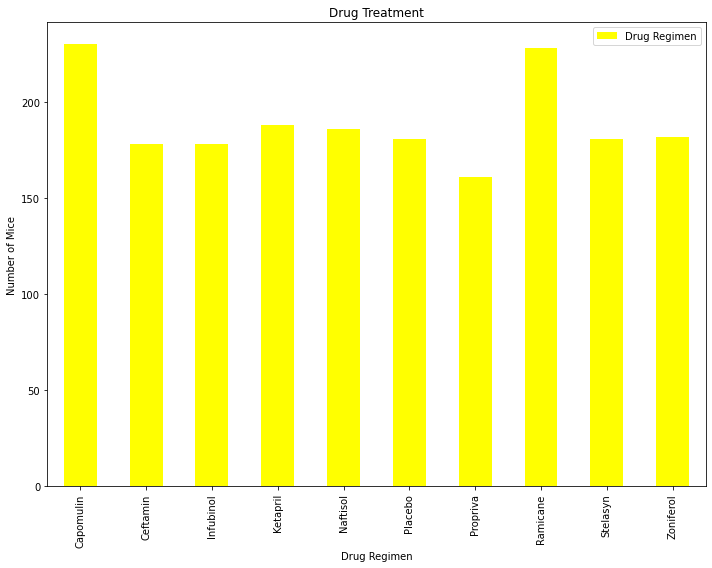

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# group by the 'Drug Reimen'
drug_group = combined_data.groupby("Drug Regimen")

# count number of data points for each drug regimen and create new DataFrame
drug_group_count = pd.DataFrame(drug_group["Drug Regimen"].count())

# create bar chart to show mouse id and drug regimen
drug_group_count.plot(kind="bar", facecolor="yellow", title="Drug Treatment", figsize=(10,8))
# Set textual properties and using metplotlib function
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()

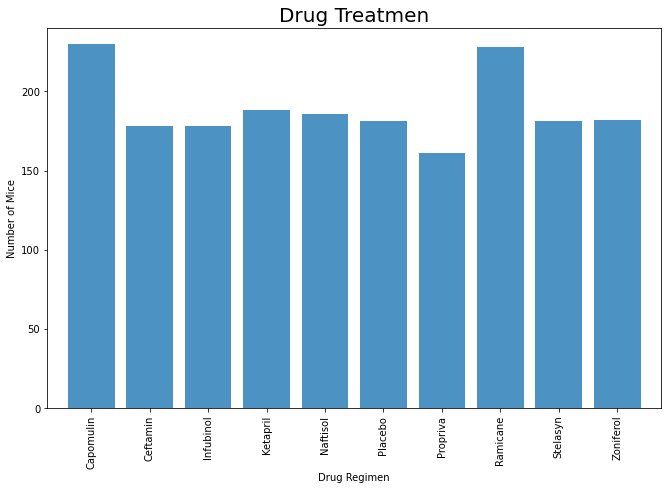

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
fig1, ax1 = plt.subplots(figsize=(11,7))
plt.bar(list(drug_group_count.index), drug_group_count["Drug Regimen"], alpha=0.8) 
# bar_data = clean_df["Drug Regimen"].value_counts()
# bar_data.plot(kind = "bar")

plt.xlim(-0.75, len(drug_group_count.index)-0.25)
plt.ylim(0, max( drug_group_count["Drug Regimen"])+10)
plt.title("Drug Treatmen",fontsize = 20)
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.show()

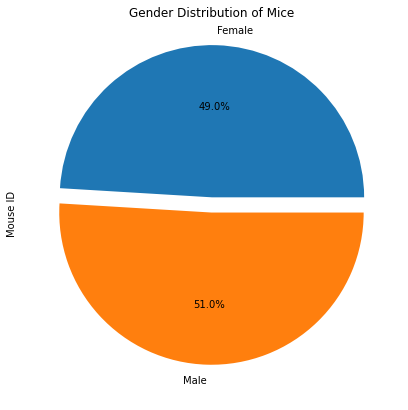

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()
gender_data = gender_data[["Sex", "Mouse ID"]]

color = ["green", "blue"]
explode = (0.1, 0)
gender_data.plot(kind='pie', y= 'Mouse ID', labels=gender_data['Sex'], autopct='%1.1f%%', 
                 title="Gender Distribution of Mice", legend = False, figsize=(11,7), explode=explode)
plt.show()

(-1.1690328427556937,
 1.1064462804487496,
 -1.2243478237815946,
 1.1135096404132752)

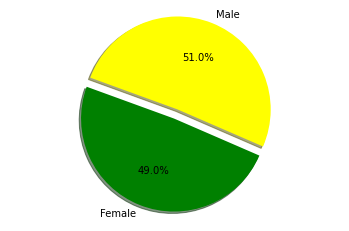

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = gender_data["Mouse ID"]
colors = ["green","yellow"]
explode = (0.1, .005)
plt.pie(pie_data, explode=explode, labels=gender_data['Sex'], colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers 
# across all four treatment regimens.
# Start by getting the last (greatest) timepoint for each mouse

max_timepoint= combined_data.groupby('Mouse ID').max()['Timepoint']
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the clean_df dataframe to get the tumor volume at the last timepoint

final_tumor_vol_df = pd.merge(max_timepoint_df, clean_df, on=("Mouse ID","Timepoint"))
final_tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [26]:
# find tumor volume for Capomulin
capomulin_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Capomulin"]
capo_tumor_volume = capomulin_df["Tumor Volume (mm3)"]

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers
capomulin_quartiles = capo_tumor_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_IQR = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin is: {capomulin_IQR}")
print(f"The the median of Capomulin is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_IQR)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_IQR)

print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

outlier_capo = final_tumor_vol_df[(final_tumor_vol_df["Tumor Volume (mm3)"] < capomulin_lower_bound) | 
                                 (final_tumor_vol_df["Tumor Volume (mm3)"] > capomulin_upper_bound)]
outlier_capo                          


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# find tumor volume for Ramicane
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers
ramicane_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Ramicane"]
rami_tumor_volume = ramicane_df["Tumor Volume (mm3)"]

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers
ramicane_quartiles = rami_tumor_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_IQR = ramicane_upperq-ramicane_lowerq

print(f"The lower quartile of Ramicane is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {ramicane_IQR}")
print(f"The the median of Ramicane is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_IQR)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_IQR)

print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

# potential outliers
outlier_rami = final_tumor_vol_df[(final_tumor_vol_df["Tumor Volume (mm3)"] < ramicane_lower_bound) | 
                                 (final_tumor_vol_df["Tumor Volume (mm3)"] > ramicane_upper_bound)]

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [28]:
# find tumor volume for Infubinol
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers
infubinol_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Infubinol"]
infub_tumor_volume = infubinol_df["Tumor Volume (mm3)"]

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers
infubinol_quartiles = infub_tumor_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_IQR = infubinol_upperq-infubinol_lowerq

print(f"The lower quartile of Infubinol is: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {infubinol_IQR}")
print(f"The the median of Infubinol is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_IQR)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_IQR)

print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

# potential outliers
outlier_infub = final_tumor_vol_df[(final_tumor_vol_df["Tumor Volume (mm3)"] < infubinol_lower_bound) | 
                                 (final_tumor_vol_df["Tumor Volume (mm3)"] > infubinol_upper_bound)]

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [18]:
# find tumor volume for Ceftamin
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers
ceftamin_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Ceftamin"]
ceft_tumor_volume = ceftamin_df["Tumor Volume (mm3)"]

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers
ceftamin_quartiles = ceft_tumor_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_IQR = ceftamin_upperq-ceftamin_lowerq

print(f"The lower quartile of Ceftamin is: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {ceftamin_IQR}")
print(f"The the median of Ceftamin is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_IQR)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_IQR)

print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

# potential outliers
outlier_ceft = final_tumor_vol_df[(final_tumor_vol_df["Tumor Volume (mm3)"] < ceftamin_lower_bound) | 
                                 (final_tumor_vol_df["Tumor Volume (mm3)"] > ceftamin_upper_bound)]

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [19]:
# # Put treatments into a list for for loop (and later for plot labels)

# treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

# ****************  This is optional - I wrote this for practice ************************

# treatment_capo = []
# treatment_rami = []
# treatment_infub = []
# treatment_ceft = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
# capomulin_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Capomulin"]
# capo_tumor_volume = capomulin_df["Tumor Volume (mm3)"]

# for i in capo_tumor_volume:
#     treatment_capo.append([i+1])
# print(treatment_capo)

# ramicane_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Ramicane"]
# rami_tumor_volume = ramicane_df["Tumor Volume (mm3)"]

# for i in rami_tumor_volume:
#     treatment_rami.append([i+1])
# print(treatment_rami)

# infubinol_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Ramicane"]
# infub_tumor_volume = infubinol_df["Tumor Volume (mm3)"]

# for i in infub_tumor_volume:
#     treatment_infub.append([i+1])

# ceftamin_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == "Ceftamin"]
# ceft_tumor_volume = ceftamin_df["Tumor Volume (mm3)"]

# for i in ceft_tumor_volume:
#     treatment_ceft.append([i+1])
    
# ****************************************** END *****************************************************    

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

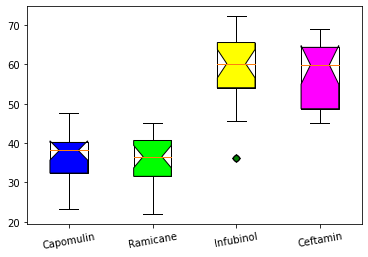

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_treatment = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_volum = [capo_tumor_volume,rami_tumor_volume,infub_tumor_volume,ceft_tumor_volume ]
green_diamon = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
box = ax.boxplot(tumor_volum, notch=True, patch_artist=True, flierprops=green_diamon)
ax.boxplot(tumor_volum)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol","Ceftamin"], rotation=10)

colors = ['#0000FF', '#00FF00', '#FFFF00', '#FF00FF']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()        

## Line and Scatter Plots

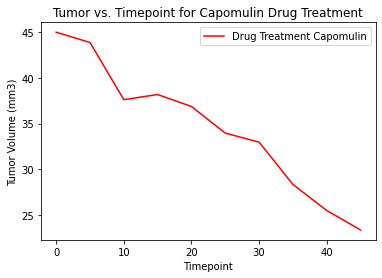

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin -filter data to Capomulin
# filter the clean_df for Capomulin then store all the value for timepoint and tumor volume.

capo_treatment = clean_df.loc[clean_df["Mouse ID"] == "s185"]
single_mouse = capo_treatment.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
# store value for x and y axis
capo_timepointx = single_mouse['Timepoint']
capo_tumor_voly = single_mouse['Tumor Volume (mm3)']

plt.plot(capo_timepointx, capo_tumor_voly, color="red", label = "Drug Treatment Capomulin")
plt.title("Tumor vs. Timepoint for Capomulin Drug Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.show()

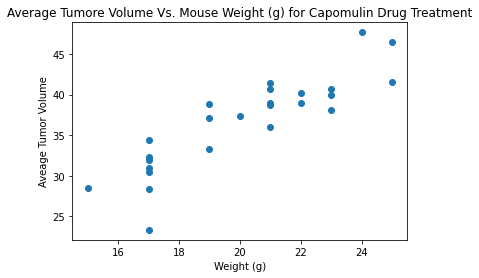

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_tumor_avg = capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
# rename the Tumor volume (mm3) column
capo_tumor_avg = capo_tumor_avg.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
# scatter plot
plt.scatter(capo_tumor_avg["Weight (g)"], capo_tumor_avg["Average Volume"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Aveage Tumor Volume")
plt.title("Average Tumore Volume Vs. Mouse Weight (g) for Capomulin Drug Treatment")
plt.show()


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# calculate the correlation coefficient
capo_tumor_avg = capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
tumor_vol = capo_tumor_avg["Tumor Volume (mm3)"]
weight = capo_tumor_avg["Weight (g)"]
correlation = st.pearsonr(tumor_vol,weight)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume is 0.88


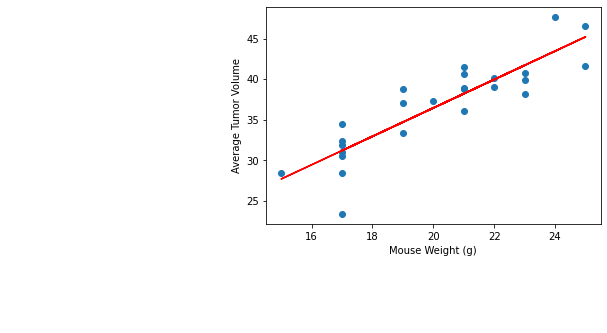

In [32]:
# linear regression model
x_value = capo_tumor_avg['Weight (g)']
y_value = capo_tumor_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()